<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT084_2021S1_T3_bertini_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T3
```

### **Enunciado**

Usando o conjunto de dados **Carseats** da biblioteca **ISLR**. Vamos prever vendas usando árvores de regressão e abordagens relacionadas.


*   **(a)** Divida o conjunto de dados em um conjunto de treinamento e um conjunto de testes.
*   **(b)** Ajuste uma árvore de regressão ao conjunto de treinamento. Plote a árvore e interprete os resultados. Qual taxa de erro de teste você obtém? 
*   **(c)** Use a validação cruzada para determinar o nível ótimo de complexidade da árvore. A poda da árvore melhora o erro de teste? 
*   **(d)** Use a abordagem de bagging para analisar esses dados. Que taxa de erro de teste você obtém? Use a função **importance()** para determinar quais variáveis são mais importantes. 
*   **(e)** Use random forests para analisar esses dados. Qual taxa de erro de teste você obtém? Use a função **importance()** para determinar quais variáveis são mais importantes. Descreva o efeito de **m**, o número das variáveis consideradas em cada divisão, na taxa de erro obtido. 

### **Instalando Bibliotecas**


---


Obs: Somente para o carregamento inicial

In [ ]:
install.packages('pacman')
pacman::p_load(ISLR,e1071,tree,randomForest,caret)

### **Inspecionando Conjunto de Dados Carseats**
Vamos dar uma olhada rápida no arquivo de dados e nos descritivos.

In [ ]:
# Atributos
str(Carseats)

'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [ ]:
# Observações
head(Carseats,5)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


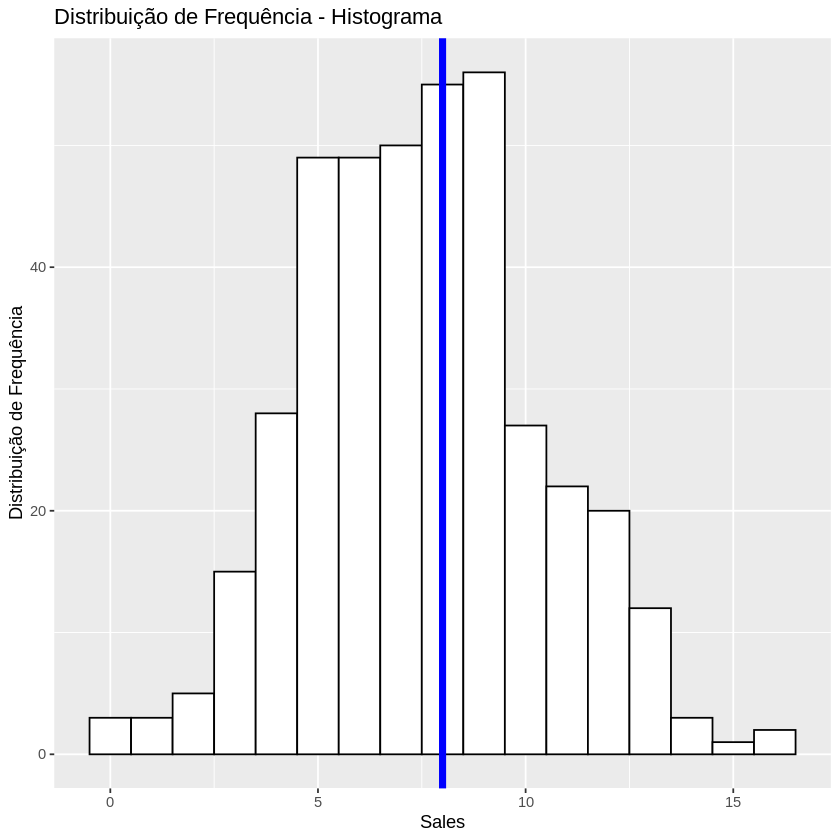

In [ ]:
# Histograma
ggplot(data=Carseats, aes(x=Sales)) +
  geom_histogram(binwidth=1, boundary=.5, fill="white", color="black") + 
  geom_vline(xintercept = 8, color="blue", size=2) +
  labs(x = "Sales") +
  labs(y = "Distribuição de Frequência") +
  labs(title = "Distribuição de Frequência - Histograma")

**(a)** Divida o conjunto de dados em um conjunto de treinamento e um conjunto de testes.

In [ ]:
set.seed(1)

halfsample <-sample(dim(Carseats)[1], dim(Carseats)[1]/2)
Carseats.train  <-Carseats[halfsample, ]
Carseats.test   <-Carseats[-halfsample, ]

tree.train  <-tree(Carseats.train)
tree.test   <-tree(Carseats.test)

**(b)** Ajuste uma árvore de regressão ao conjunto de treinamento. Plote a árvore e interprete os resultados. Qual taxa de erro de teste você obtém?

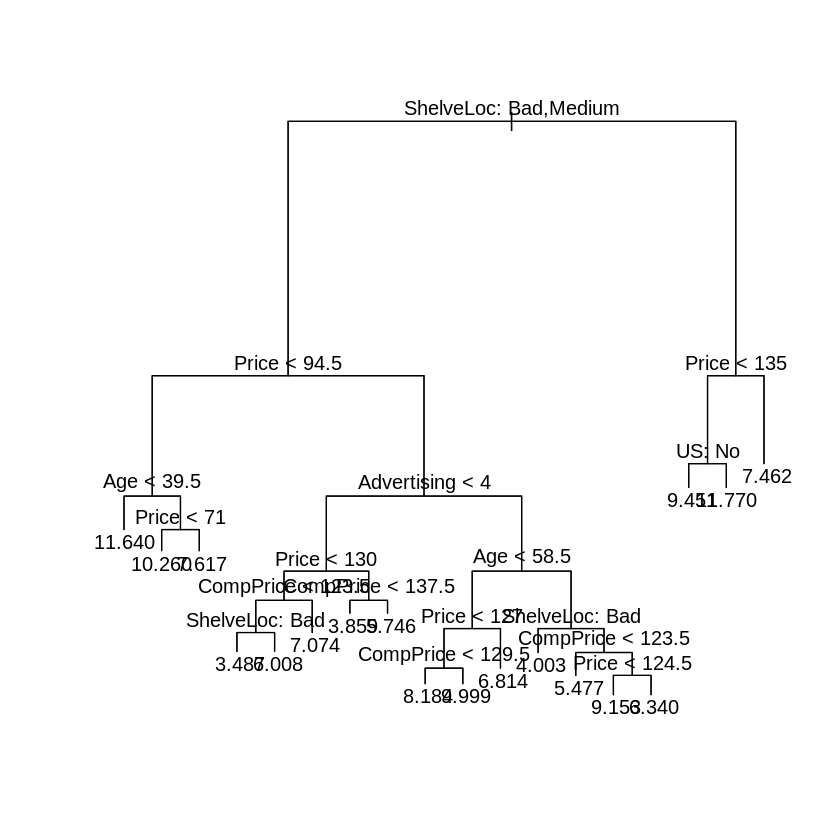

In [ ]:
plot(tree.train)
text(tree.train, pretty=0)

In [ ]:
summary(tree.train)
cat("\n")
cat("Treino, Number of terminal nodes:  18\n")
cat("Treino, Residual mean deviance:  2.17\n")
cat("\n\n")


Regression tree:
tree(formula = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 


Treino, Number of terminal nodes:  18
Treino, Residual mean deviance:  2.17




**(c)** Use a validação cruzada para determinar o nível ótimo de complexidade da árvore. A poda da árvore melhora o erro de teste? 



KFold - Validação cruzada no conjunto de treinamento

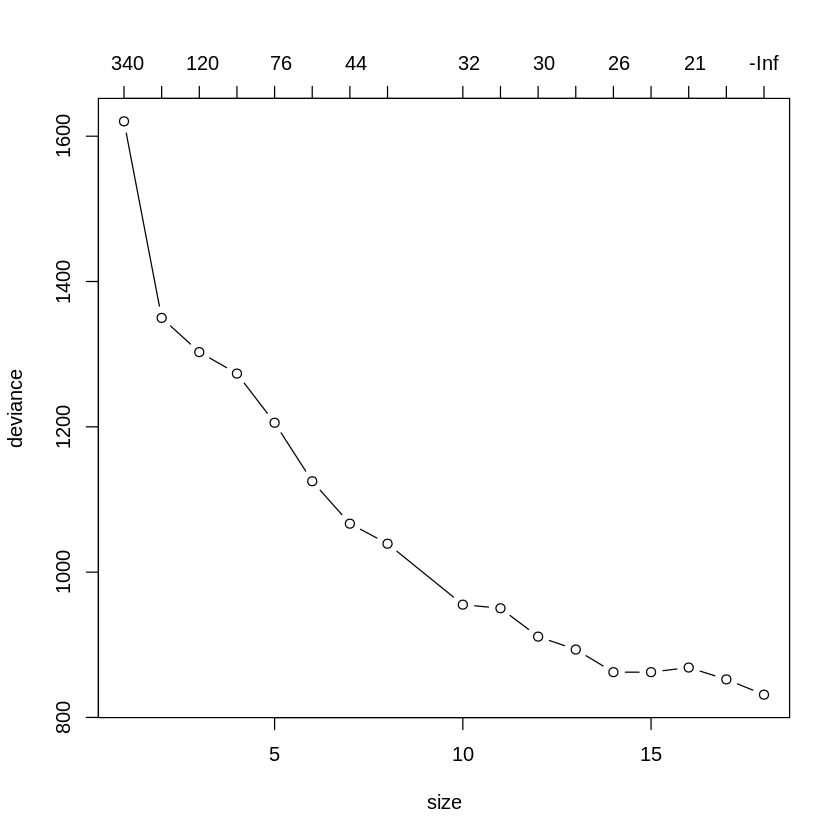

In [ ]:
cv.train   <-cv.tree(tree.train)
plot(cv.train, type='b')
cat("\n\n")
cat("KFold - Validação cruzada no conjunto de treinamento")

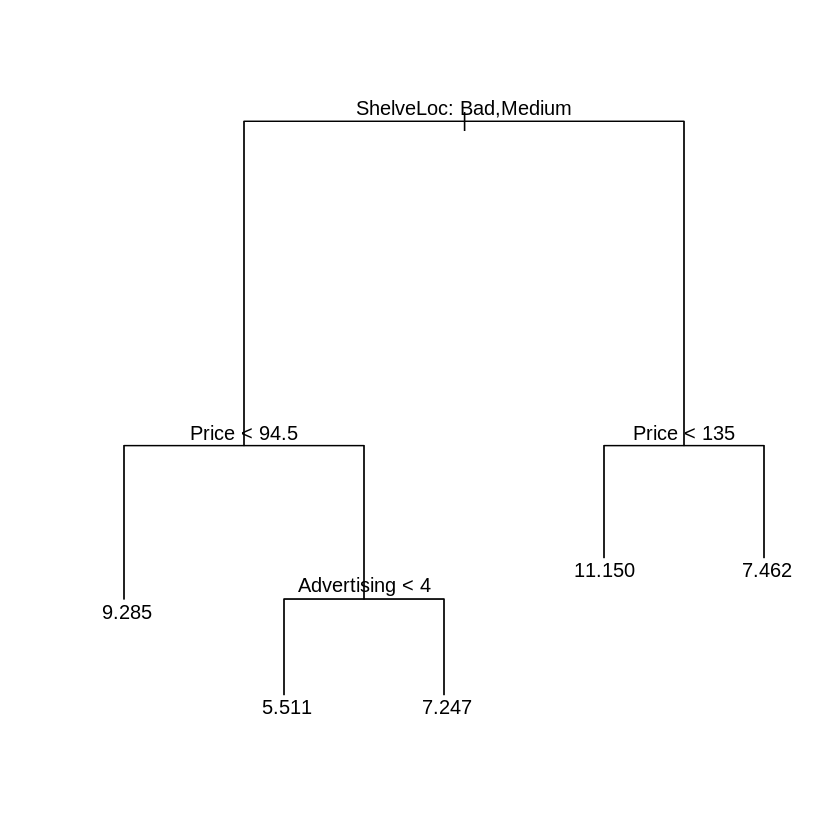

In [ ]:
prune.train <-prune.tree(tree.train,best =5)
plot(prune.train)
text(prune.train, pretty=0)

In [ ]:
summary(tree.train)
cat("\n")
summary(prune.train)
cat("\n")
cat("Teste Poda: Number of terminal nodes:  5\n")
cat("Teste Poda: Residual mean deviance:  4.4\n")
cat("\n\n")
cat("A poda na árvore piorou a 'Residual mean deviance' que foi de 2.18 para 4.4")


Regression tree:
tree(formula = Carseats.train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 


Regression tree:
snip.tree(tree = tree.train, nodes = c(6L, 10L, 4L, 11L))
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Advertising"
Number of terminal nodes:  5 
Residual mean deviance:  4.405 = 859 / 195 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-5.82700 -1.32700  0.03654  0.00000  1.46400  4.79300 


Teste Poda: Number of terminal nodes:  5
Teste Poda: Residual mean deviance:  4.4


A poda na árvore piorou a 'Residual mean deviance' que foi de 2.18 para 4.4

**(d)** Use a abordagem de bagging para analisar esses dados. Que taxa de erro de teste você obtém? Use a função **importance()** para determinar quais variáveis são mais importantes.

In [ ]:
set.seed(1)
bag.carseats <-randomForest(Sales~.,data=Carseats.train, mtry=10, importance =TRUE)
bag.carseats


Call:
 randomForest(formula = Sales ~ ., data = Carseats.train, mtry = 10,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 10

          Mean of squared residuals: 2.889221
                    % Var explained: 63.26

In [ ]:
importance(bag.carseats)

,%IncMSE,IncNodePurity
CompPrice,24.8888481,170.182937
Income,4.7121131,91.264880
Advertising,12.7692401,97.164338
Population,-1.8074075,58.244596
Price,56.3326252,502.903407
ShelveLoc,48.8886689,380.032715
Age,17.7275460,157.846774
Education,0.5962186,44.598731
Urban,0.1728373,9.822082
US,4.2172102,18.073863


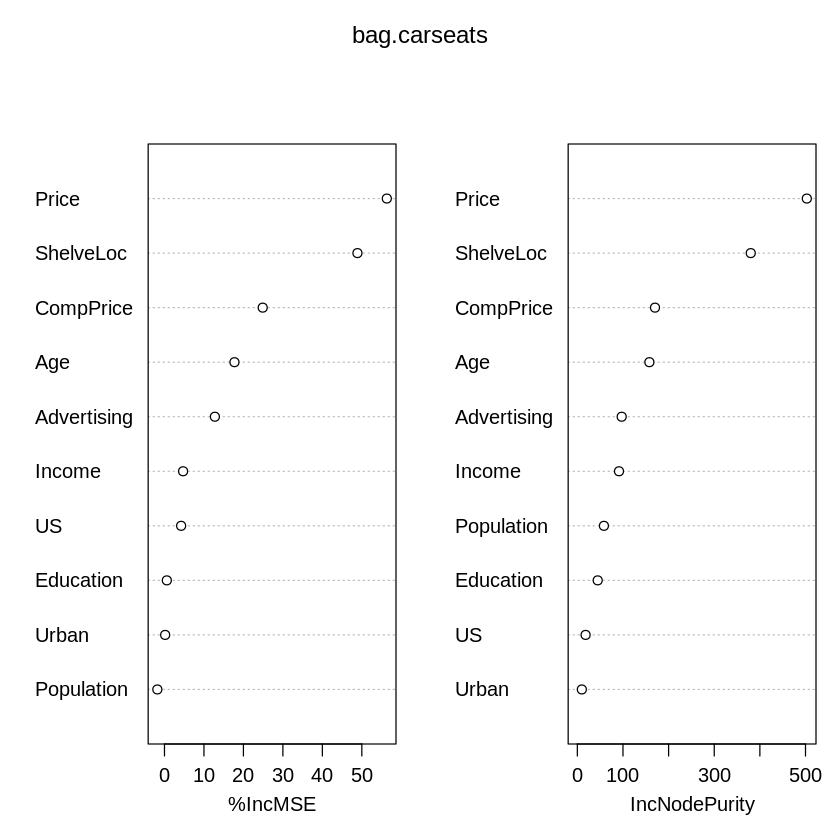

In [ ]:
varImpPlot(bag.carseats)

**(e)** Use random forests para analisar esses dados. Qual taxa de erro de teste você obtém? Use a função **importance()** para determinar quais variáveis são mais importantes. Descreva o efeito de **m**, o número das variáveis consideradas em cada divisão, na taxa de erro obtido.

In [ ]:
set.seed(1)
rf.carseats <-randomForest(Sales~.,data=Carseats.train, mtry=2, importance =TRUE)
rf.carseats


Call:
 randomForest(formula = Sales ~ ., data = Carseats.train, mtry = 2,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 3.746111
                    % Var explained: 52.36

In [ ]:
importance(rf.carseats)

,%IncMSE,IncNodePurity
CompPrice,10.9869355,146.22780
Income,1.4399605,139.17961
Advertising,8.9514273,112.46400
Population,-2.5363969,117.42445
Price,31.2455597,333.21042
ShelveLoc,31.9991318,259.49327
Age,11.2219041,177.48730
Education,-0.6902587,85.05829
Urban,1.4115786,20.39054
US,5.7897717,32.82436


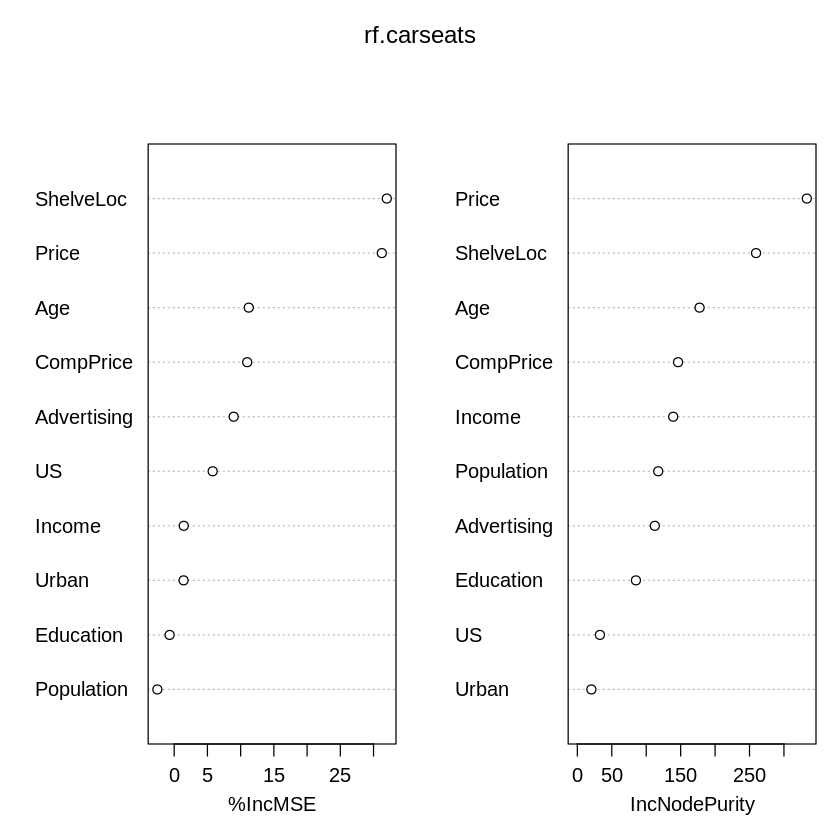

In [ ]:
varImpPlot(rf.carseats)